<a href="https://colab.research.google.com/github/ipek-yilmaz/Iris-dataset-prediction-classification-models-with-python/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Iris Dataset

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [ ]:
dataset = pd.read_csv("iris.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Encoding the Independent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Importing Models

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
nb = GaussianNB()
logistic_reg = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kernel_svm = SVC(kernel = 'rbf', random_state = 42)
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

models = ["Naive Bayes", "Logistic Reg", "KNN", "Kernel SVM", "Decision Tree", "Random Forest"]

### Train and Test Models

In [ ]:
def train_models(classifier, X_train, y_train):
  classifier.fit(X_train, y_train)

def test_models(classifier, X_test):
  return classifier.predict(X_test)


In [ ]:
#iterate for each model
classifier = [nb, logistic_reg, knn, kernel_svm, decision_tree, random_forest]
y_pred_val = [0]*6

for i in range(6):
  train_models(classifier[i], X_train, y_train)
  y_pred = test_models(classifier[i], X_test)
  y_pred_val[i] = y_pred

### Making the Confusion Matrix

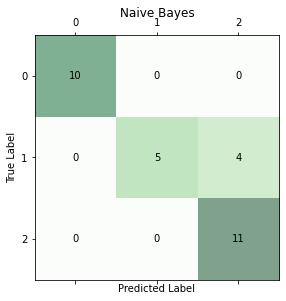

Accuracy 0.87



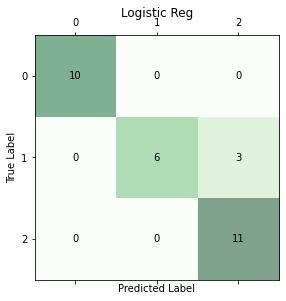

Accuracy 0.90



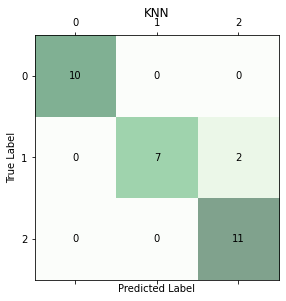

Accuracy 0.93



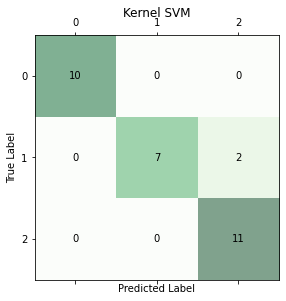

Accuracy 0.93



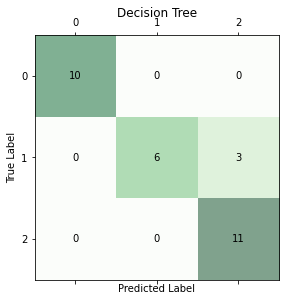

Accuracy 0.90



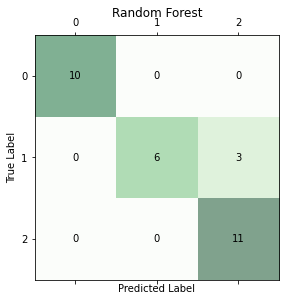

Accuracy 0.90



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

model_accuracy = [0] *6
def create_confusion_matrix(y_test, y_pred, models):
  
  for m in range(len(y_pred)):
    cm = confusion_matrix(y_test, y_pred[m])
    figure, ax = plt.subplots(figsize=(4.5, 4.5))
    ax.matshow(cm, cmap=plt.cm.Greens, alpha=0.5)
    for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(x=j, y=i,
            s=cm[i, j], 
            va='center', ha='center')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"{models[m]}")
    plt.show()
    accuracy = accuracy_score(y_test, y_pred[m])
    print(f"Accuracy {accuracy:.2f}\n")
    model_accuracy[m] = accuracy
    

create_confusion_matrix(y_test, y_pred_val,models)

### Comparing Accuracy of Models

<Figure size 432x288 with 0 Axes>

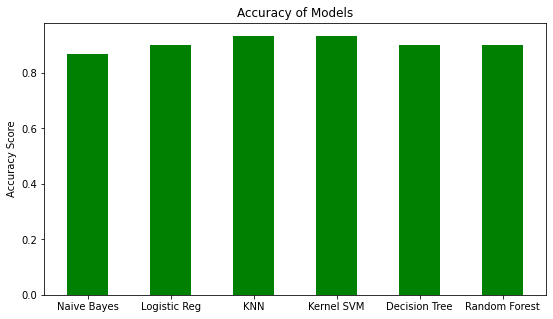

In [ ]:
y_pos = np.arange(len(models))
y_val = [ x for x in model_accuracy]
fig = plt.figure()
plt.figure(figsize=(9, 5))  # width:9, height:5
plt.bar(y_pos, y_val, align='center', width=0.5, color = 'g')
plt.xticks(y_pos, models)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()